<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;">    <div style="font-size:150%; color:#FEE100"><b>Google Stock Data Analysis</b></div>    <div></a></div></div>

## Table of Contents

- [Introduction](#Introduction)
- [Imports and Initial Setup](#Imports-and-Initial-Setup)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Predictor](#Predictor)
- [Conclusion](#Conclusion)

## Introduction

There's something fascinating about stock market data; it provides both an air of mystery and an exciting challenge, particularly when it comes to deciphering the trends behind the numbers. In this notebook, we delve deeply into historical data for Google's stock to discover intriguing patterns, trends, and perhaps even build a model that predicts the future behavior of stock prices. If you find these insights useful, please consider upvoting this notebook.

In [1]:
# Import necessary libraries and set up the environment
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib
matplotlib.use('Agg')  # Ensure non-GUI backend
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# For machine learning tasks
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Configure plot aesthetics
sns.set(style="whitegrid")

# Display basic configuration
print('Environment is set up.')

Environment is set up.


## Data Loading

In this section, we load the Google stock historical data. Note that the file is expected to be located in the same directory as the notebook.

In [2]:
# Load the dataset
data_path = '/kaggle/input/google-stocks-historical-data/Google_stock_data.csv'
df = pd.read_csv(data_path, encoding='ascii', delimiter=',')

# Display the first few rows to verify successful loading
print('Dataset loaded. Here are the first few rows:')
df.head()


Dataset loaded. Here are the first few rows:


,Date,Close,High,Low,Open,Volume
0,2004-08-19,2.484366,2.576470,2.375919,2.475947,897427216
1,2004-08-20,2.681699,2.700763,2.488327,2.500954,458857488
2,2004-08-23,2.708686,2.809705,2.700021,2.742112,366857939
3,2004-08-24,2.596526,2.763156,2.564338,2.754243,306396159
4,2004-08-25,2.624504,2.674023,2.572014,2.598754,184645512


## Data Cleaning and Preprocessing

The data comes with a date column stored as a string and a variety of numerical features. A critical step in our analysis is ensuring that the date column is correctly parsed and that numeric features are correctly recognized. Here we convert the 'Date' column into an appropriate datetime object and inspect our data for any other anomalies.

In [3]:
# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Check for any missing or null values after conversion
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# If Date conversion resulted in NaT, it's important to note and possibly remove or impute these values
df = df.dropna(subset=['Date'])

# Reset index after dropping rows, if necessary
df.reset_index(drop=True, inplace=True)

# Show info to verify data types
print('\nData types after preprocessing:')
print(df.dtypes)

Missing values in each column:
Date      0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64

Data types after preprocessing:
Date      datetime64[ns]
Close            float64
High             float64
Low              float64
Open             float64
Volume             int64
dtype: object


## Exploratory Data Analysis

Now, we visualize various aspects of the data to gain a better understanding of the underlying patterns. We use multiple visualization techniques including histograms, pair plots, box plots, and a correlation heatmap (if the dataset has sufficient numeric columns).

<Figure size 1200x800 with 0 Axes>

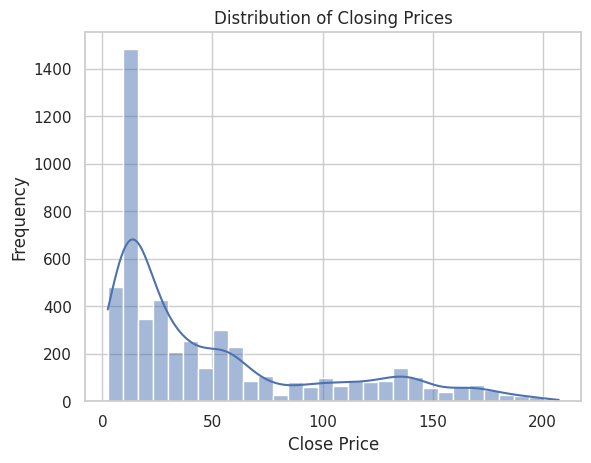

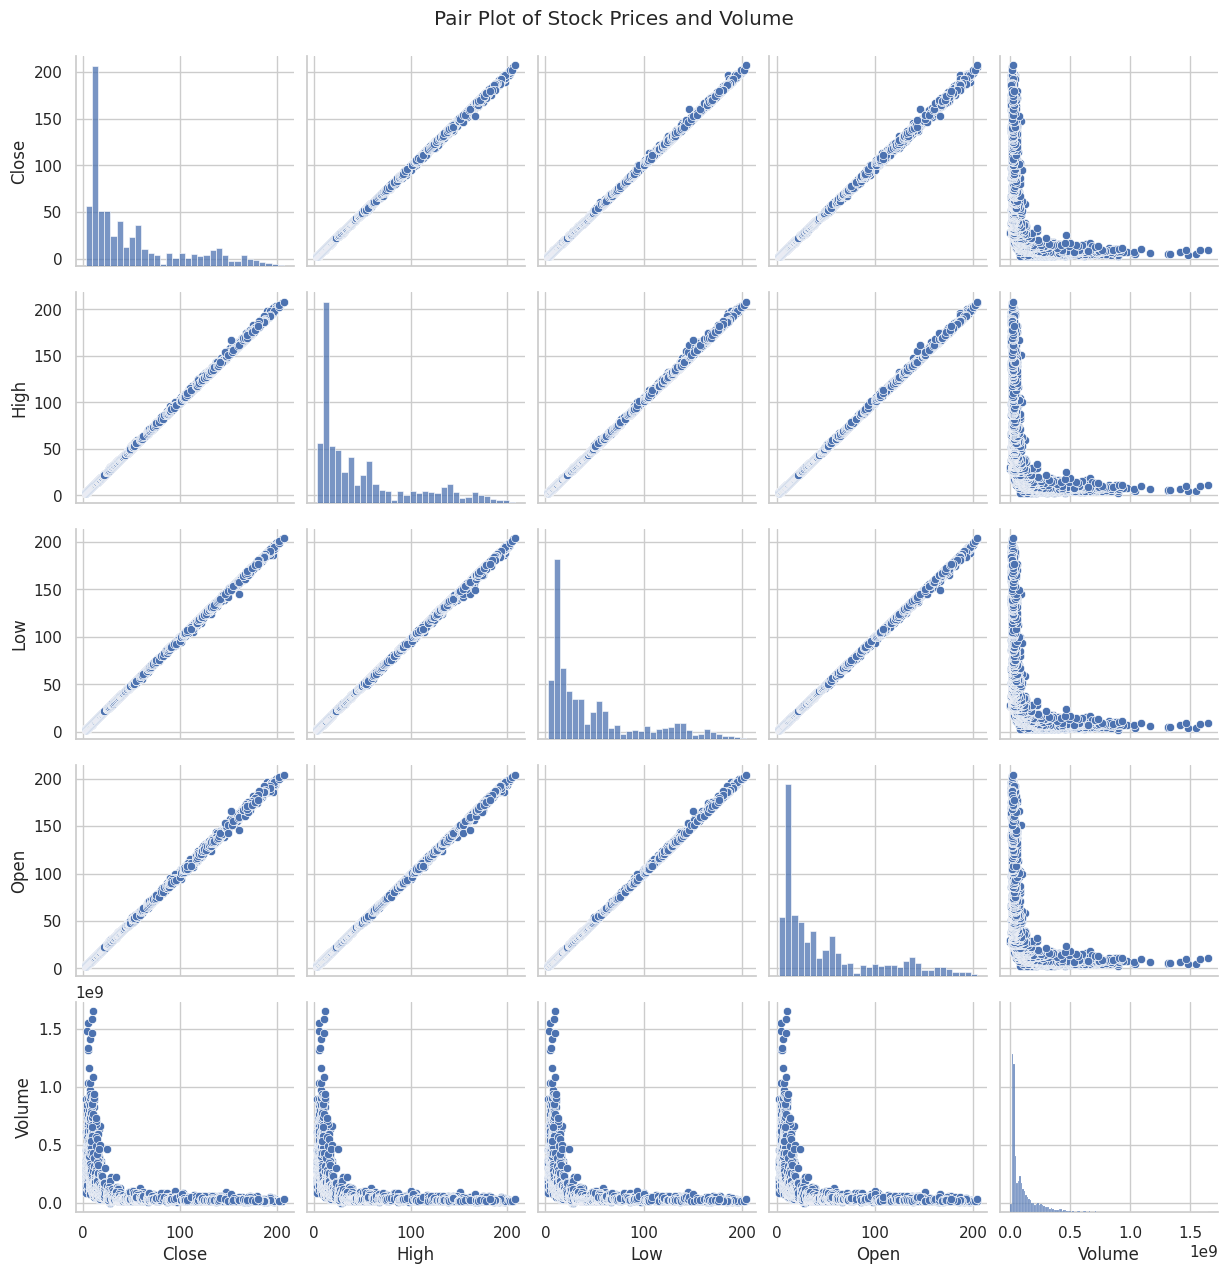

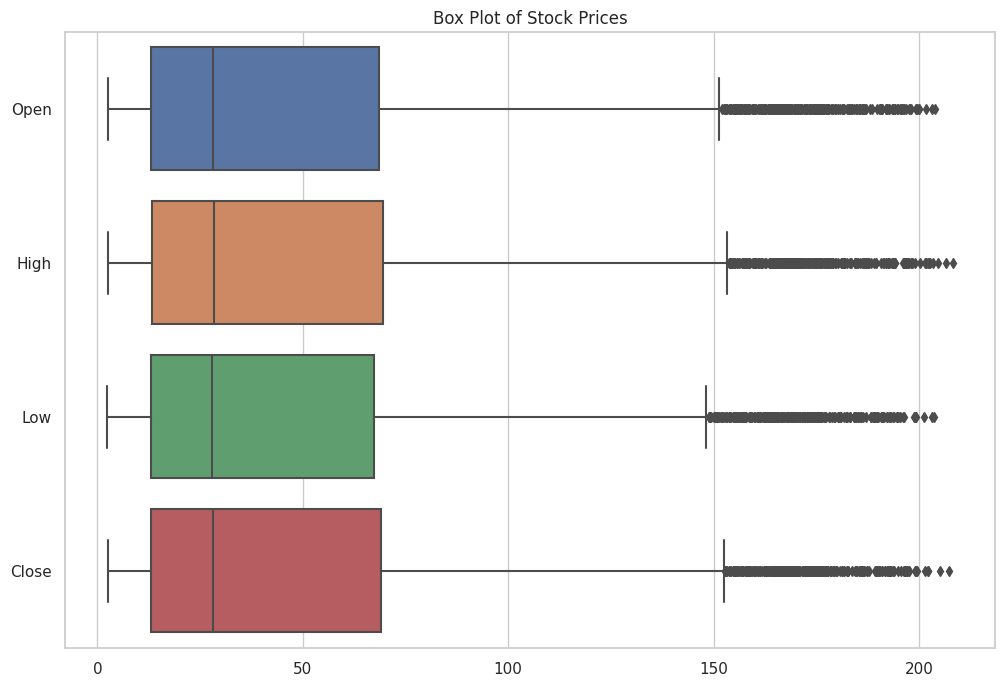

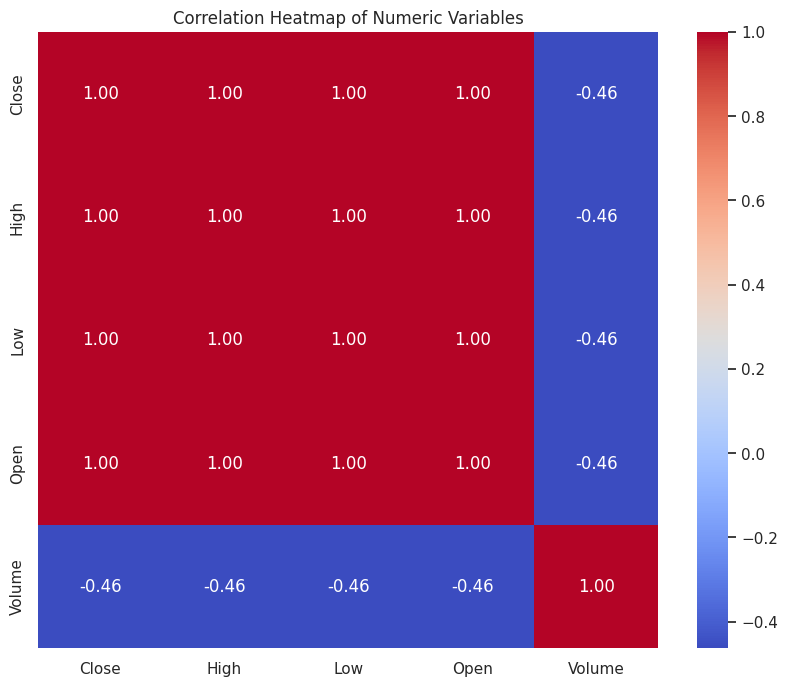

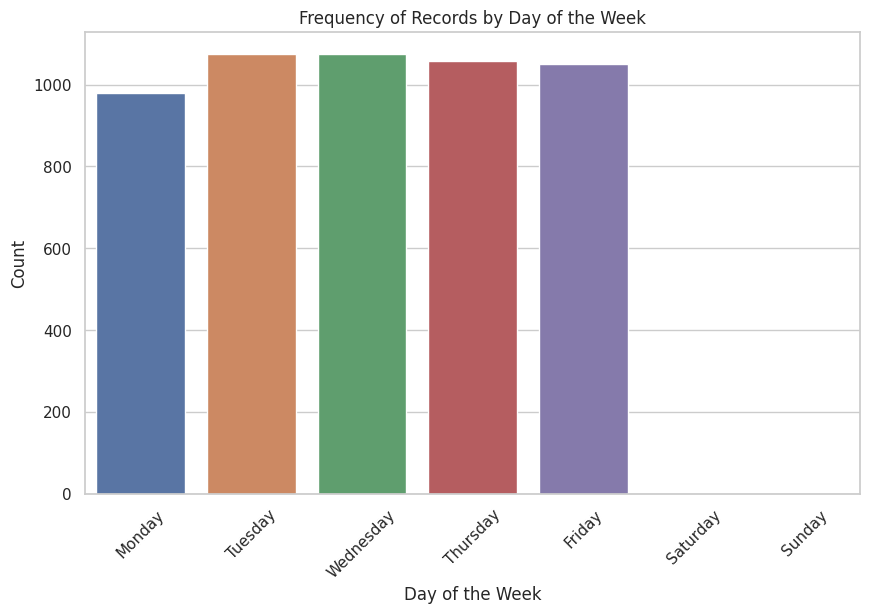

In [4]:
# Set the overall figure size for plots
plt.figure(figsize=(12, 8))

# Histogram for 'Close' price
plt.figure()
sns.histplot(df['Close'], kde=True, bins=30)
plt.title('Distribution of Closing Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

# Pair Plot for numerical columns
sns.pairplot(df[['Close', 'High', 'Low', 'Open', 'Volume']])
plt.suptitle('Pair Plot of Stock Prices and Volume', y=1.02)
plt.show()

# Box Plot to inspect outliers for Open, High, Low, and Close
plt.figure(figsize=(12, 8))
sns.boxplot(data=df[['Open', 'High', 'Low', 'Close']], orient='h')
plt.title('Box Plot of Stock Prices')
plt.show()

# If there are four or more numeric columns, create a correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation = numeric_df.corr()
    sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Variables')
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Count plot for the day of week to see if there's any interesting pattern
# Extract day of week from the Date column
df['DayOfWeek'] = df['Date'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DayOfWeek', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Frequency of Records by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Predictor

Given that historical stock data often exhibit trends over time, we can attempt to predict the closing stock price. Here, we build a simple predictor using a Random Forest Regressor. We choose the following features for prediction: 'Open', 'High', 'Low', and 'Volume'. The model is evaluated using the R² score and Mean Squared Error. This approach provides a baseline that can be enhanced with more sophisticated feature engineering or alternative models.

R² Score: 1.000
Mean Squared Error: 0.273


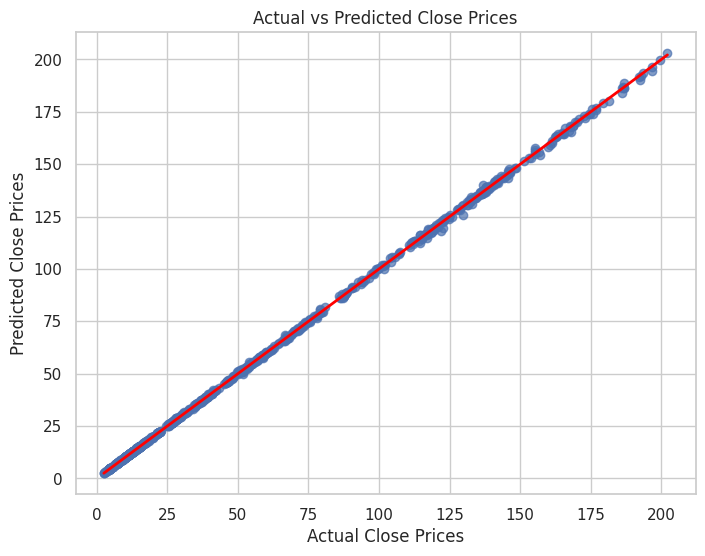

In [5]:
# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume']
target = 'Close'

# Prepare data for modeling
X = df[features]
y = df[target]

# Split into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'R² Score: {r2:.3f}')
print(f'Mean Squared Error: {mse:.3f}')

# Display a scatter plot of Actual vs Predicted values for a visual check
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel('Actual Close Prices')
plt.ylabel('Predicted Close Prices')
plt.title('Actual vs Predicted Close Prices')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)  # Diagonal line
plt.show()

## Conclusion

In this notebook, we embarked on an exploratory journey into Google's stock historical data. The analysis encompassed data cleaning, various visualization techniques, and a baseline predictive modeling exercise using a Random Forest Regressor. A notable challenge was ensuring that the string representation of dates was correctly translated to datetime objects, a step that is often critical in time series analyses. 

For future analyses, consider exploring more advanced models, temporal decomposition techniques, or even incorporating external factors that might influence stock prices. We hope this notebook has provided valuable insights and a reliable starting point for your deeper analyses. If you found the notebook useful, please consider upvoting it.